<a href="https://colab.research.google.com/github/AkuOO4/IMSC-Class/blob/main/SEM-5/Rclass/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2: EDA on "Iris Dataset"

a)For the Iris dataset, which contains measurements of various iris flowers, conduct  an EDA.

b) Determine if there are statistically significant differences in sepal lengths between            different species using a suitable statistical test.

c)Create a pair plot to visualize the relationships between all variables.

In [ ]:
library(tidyverse)
library(ggplot2)
library(stats)

iris_data <- read.csv("Iris.csv")

       Id         SepalLengthCm    SepalWidthCm   PetalLengthCm  
 Min.   :  1.00   Min.   :4.300   Min.   :2.000   Min.   :1.000  
 1st Qu.: 38.25   1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600  
 Median : 75.50   Median :5.800   Median :3.000   Median :4.350  
 Mean   : 75.50   Mean   :5.843   Mean   :3.054   Mean   :3.759  
 3rd Qu.:112.75   3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100  
 Max.   :150.00   Max.   :7.900   Max.   :4.400   Max.   :6.900  
  PetalWidthCm     Species         
 Min.   :0.100   Length:150        
 1st Qu.:0.300   Class :character  
 Median :1.300   Mode  :character  
 Mean   :1.199                     
 3rd Qu.:1.800                     
 Max.   :2.500                     

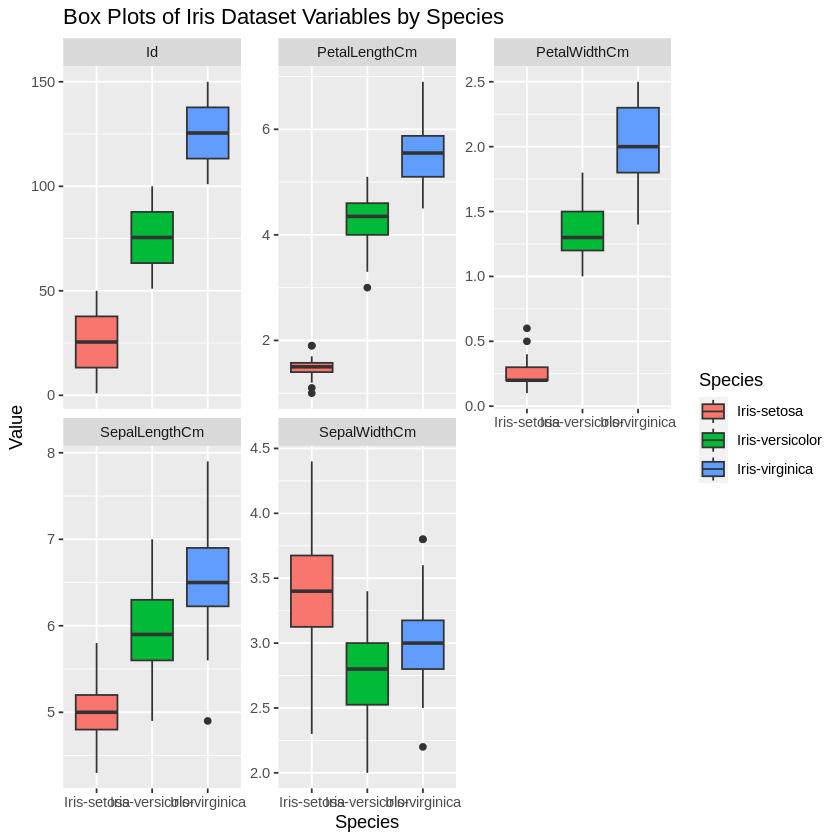

In [ ]:
# Replace missing values with the median of each variable
iris_data <- iris_data %>%
  mutate_all(~ifelse(is.na(.), median(., na.rm = TRUE), .))


# Summary statistics
summary(iris_data)

# Box plots for each variable by species
iris_data %>%
  gather(key = "Variable", value = "Value", -Species) %>%
  ggplot(aes(x = Species, y = Value, fill = Species)) +
  geom_boxplot() +
  facet_wrap(~Variable, scales = "free_y") +
  labs(title = "Box Plots of Iris Dataset Variables by Species")



In [ ]:
# ANOVA test for sepal lengths between different species
anova_result <- aov(SepalLengthCm ~ Species, data = iris_data)
summary(anova_result)

# Post-hoc Tukey test for pairwise comparisons
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  63.21  31.606   119.3 <2e-16 ***
Residuals   147  38.96   0.265                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SepalLengthCm ~ Species, data = iris_data)

$Species
                                diff       lwr       upr p adj
Iris-versicolor-Iris-setosa    0.930 0.6862273 1.1737727     0
Iris-virginica-Iris-setosa     1.582 1.3382273 1.8257727     0
Iris-virginica-Iris-versicolor 0.652 0.4082273 0.8957727     0



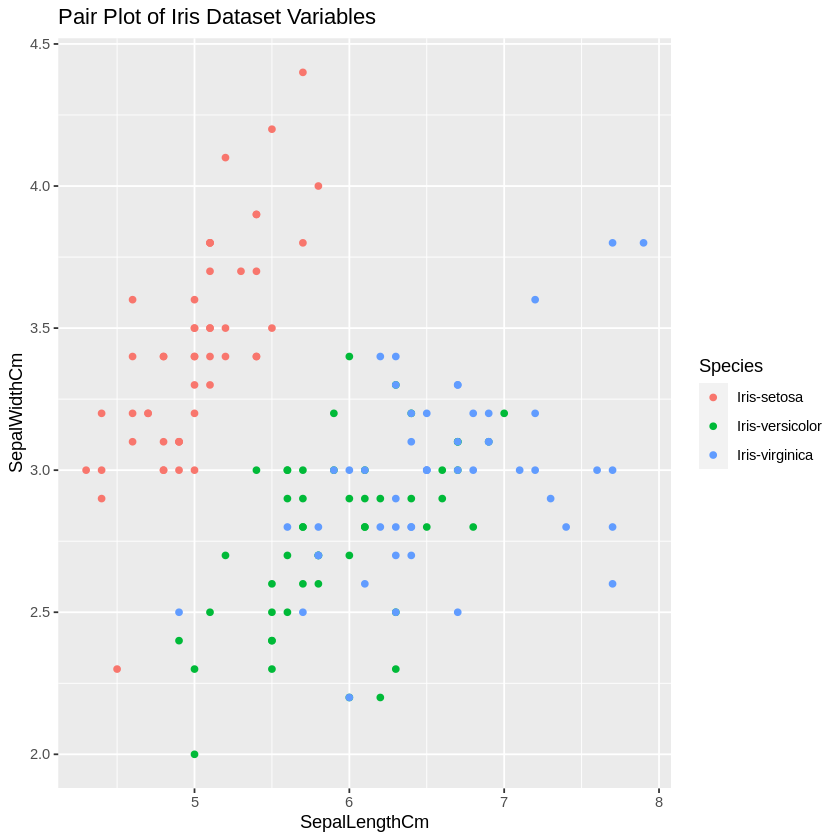

In [ ]:
pair_plot <- ggplot(iris_data, aes(x = SepalLengthCm, y = SepalWidthCm, color = Species)) +
  geom_point() +
  labs(title = "Pair Plot of Iris Dataset Variables")

print(pair_plot)